<IPython.core.display.Javascript object>


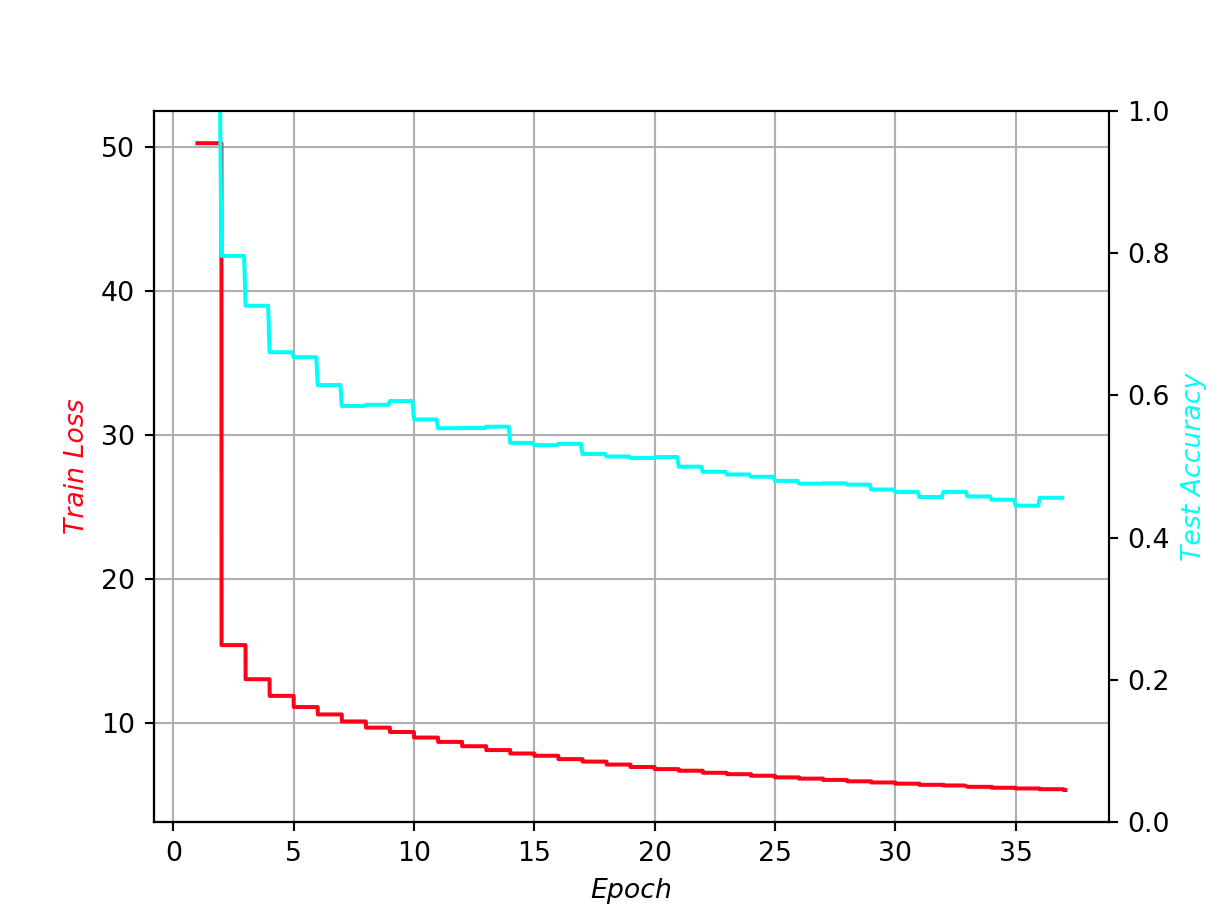

In [1]:
%matplotlib notebook
import longview as lv

train_cli = lv.WatchClient()
test_cli = lv.WatchClient()

plot = lv.LinePlot()

train_loss = train_cli.create_stream("batch", 'map(lambda v:(v.metrics.epochf, v.metrics.epoch_loss), l)')
plot.show(train_loss, xlabel='Epoch', ylabel='Train Loss', final_show=False)

test_acc = test_cli.create_stream("batch", 'map(lambda v:(v.metrics.epochf, v.metrics.epoch_loss), l)')
plot.show(test_acc, xlabel='Epoch', ylabel='Test Accuracy', ylim=(0,1))

<IPython.core.display.Javascript object>


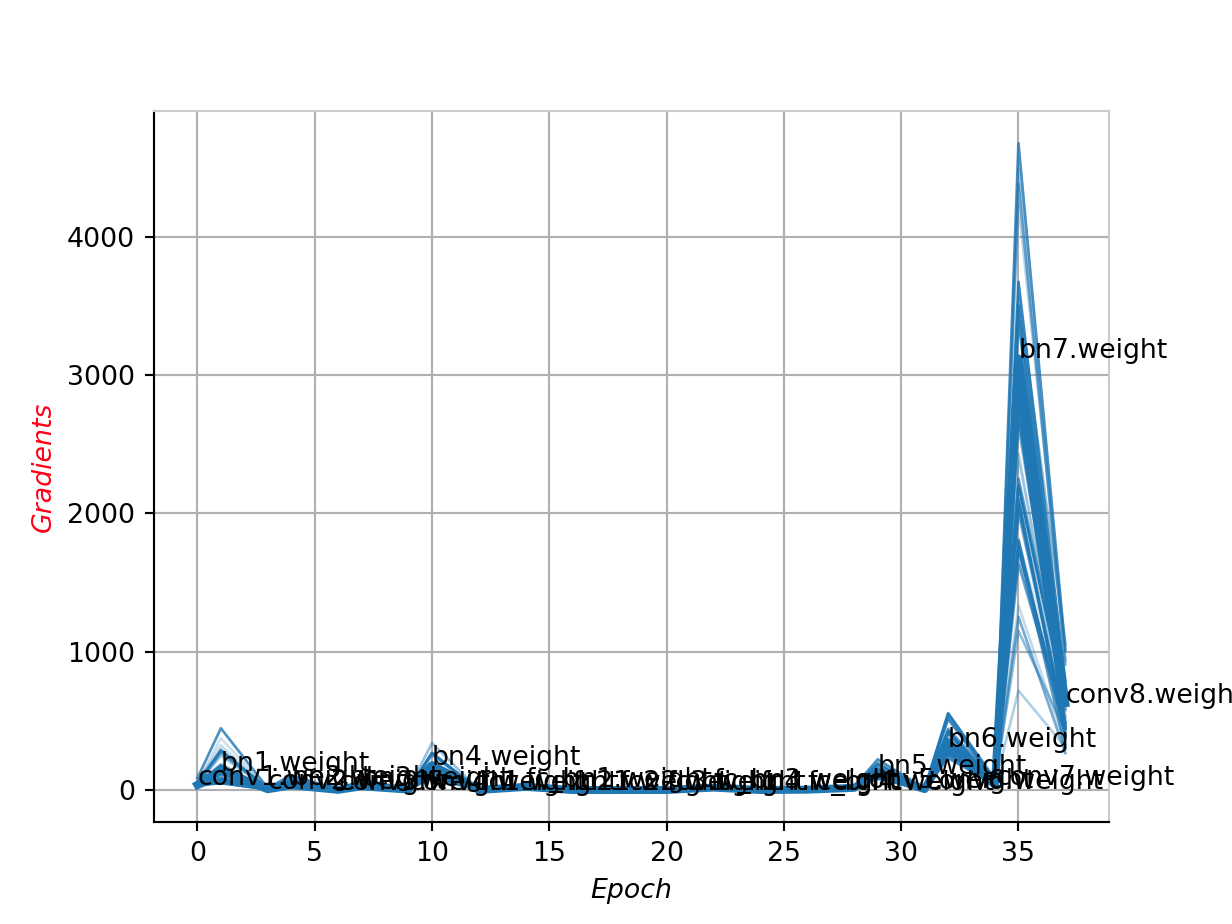

In [2]:
grads = train_cli.create_stream('batch', 'map(lambda d:agg_params(d.model, lambda p: p.grad.abs().mean().item()), l)', throttle=1)
grad_plot = lv.LinePlot()
grad_plot.show(grads, xlabel='Epoch', ylabel='Gradients', redraw_after=0, keep_old=40, dim_old=True)

<IPython.core.display.Javascript object>


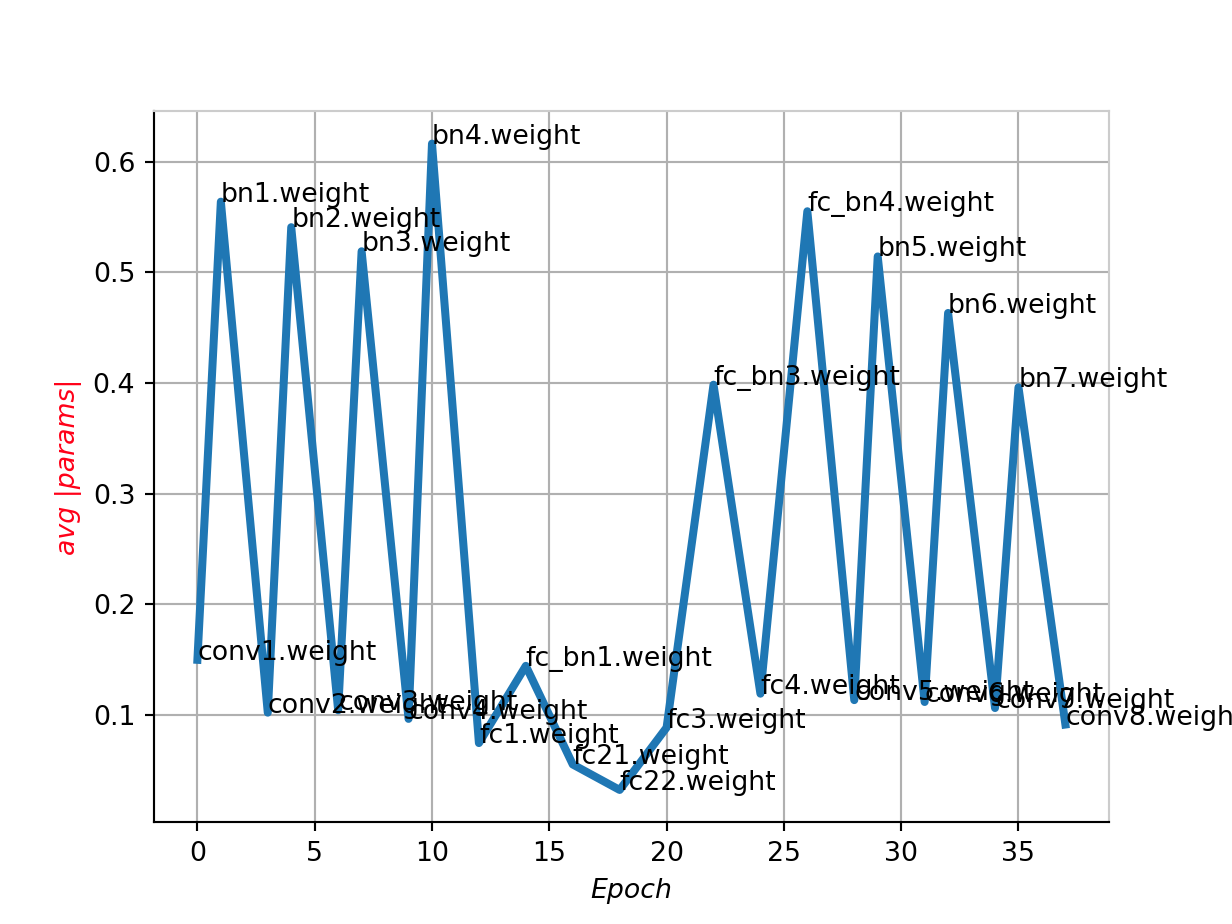

In [3]:
params = train_cli.create_stream('batch', 'map(lambda d:agg_params(d.model, lambda p: p.abs().mean().item()), l)', throttle=1)
params_plot = lv.LinePlot()
params_plot.show(params, xlabel='Epoch', ylabel='avg |params|', redraw_after=0, keep_old=40, dim_old=True)

<IPython.core.display.Javascript object>


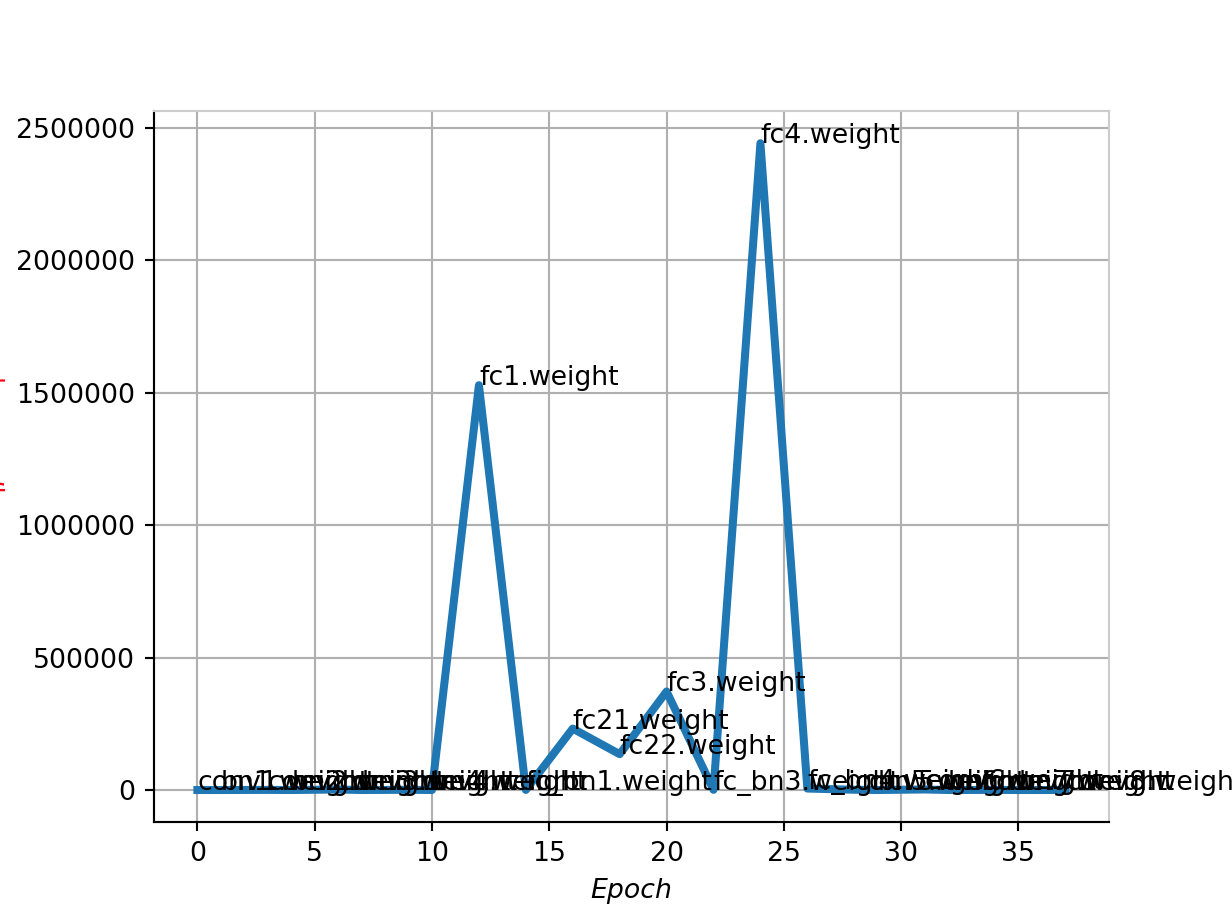

In [4]:
params_sum = train_cli.create_stream('batch', 'map(lambda d:agg_params(d.model, lambda p: p.abs().sum().item()), l)', throttle=1)
params_sum_plot = lv.LinePlot()
params_sum_plot.show(params_sum, xlabel='Epoch', ylabel='sum |params|', redraw_after=0, keep_old=40, dim_old=True)

<IPython.core.display.Javascript object>


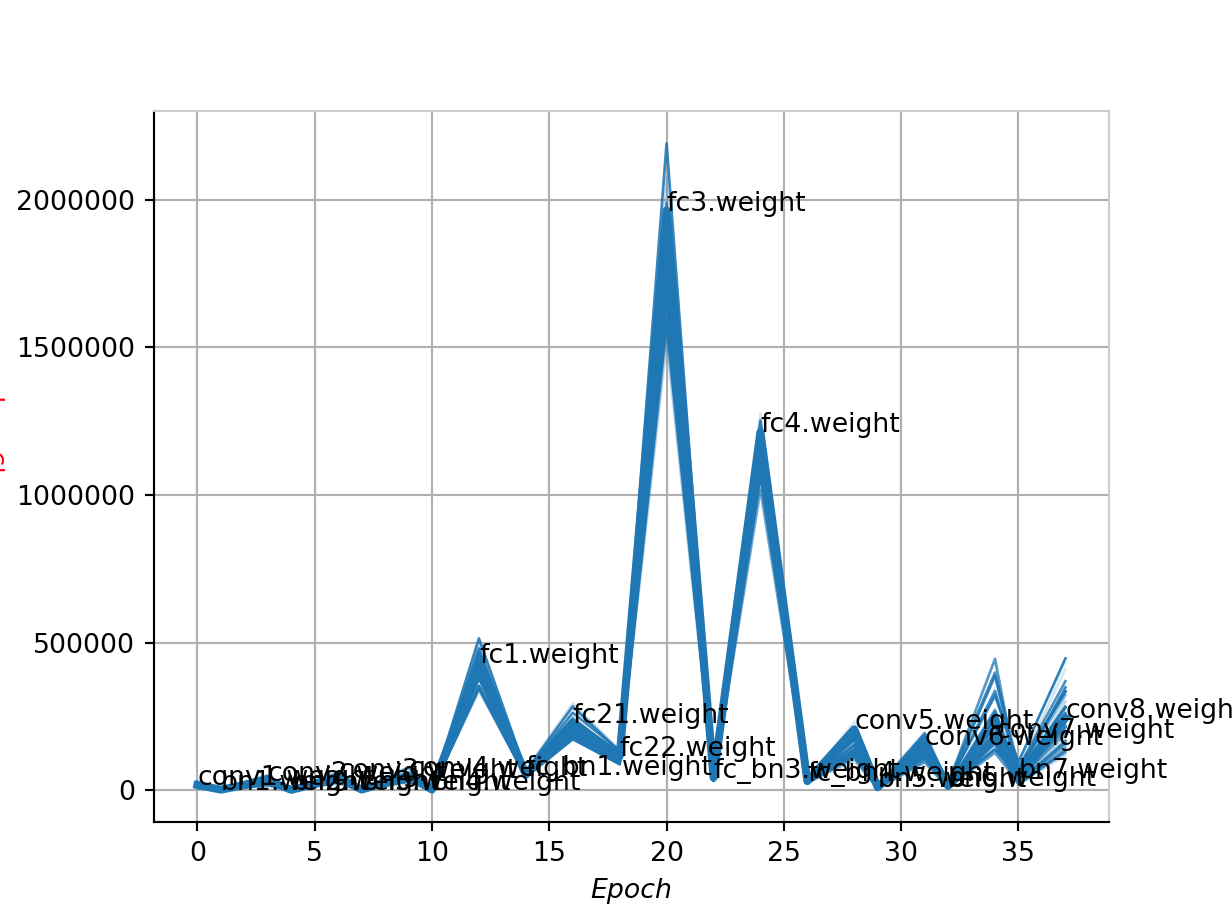

In [5]:
grad_sum = train_cli.create_stream('batch', 'map(lambda d:agg_params(d.model, lambda p: p.grad.abs().sum().item()), l)', throttle=1)
grad_sum_plot = lv.LinePlot()
grad_sum_plot.show(grad_sum, xlabel='Epoch', ylabel='sum |grad|', redraw_after=0, keep_old=40, dim_old=True)

<IPython.core.display.Javascript object>


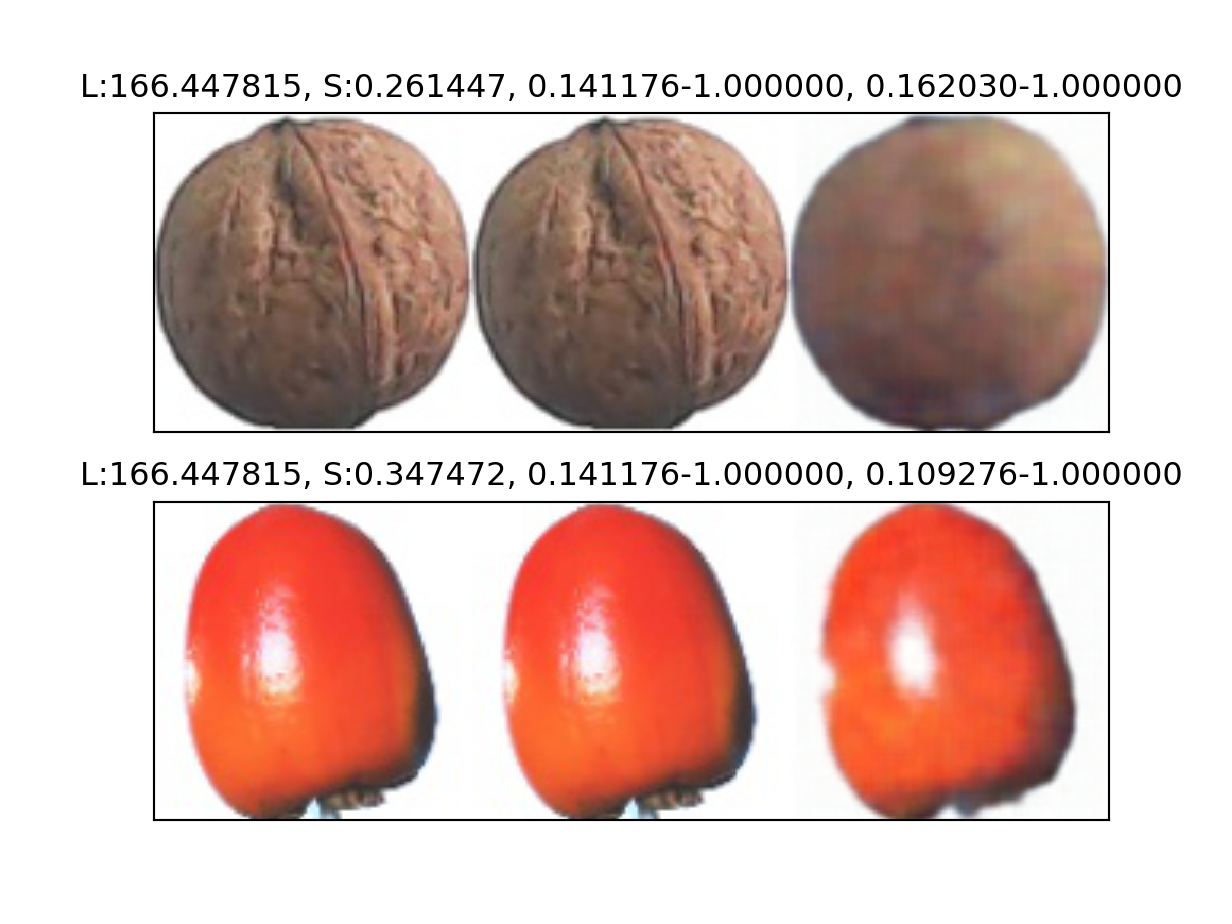

In [6]:
imgs = train_cli.create_stream('batch', 
    "top(l, out_xform=pyt_img_img_out_xform, group_key=lambda x:'', topk=2, order='rnd')", throttle=1)
img_plot = lv.ImagePlot()
img_plot.show(imgs, img_width=100, img_height=100, viz_img_scale=3, cols=1)